<a href="https://colab.research.google.com/github/pamis-costa/2_etapa_lads/blob/main/desafio_2_etapa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introdu√ß√£o √† An√°lise de Dados com Pandas
## Processo Seletivo LADS - Etapa 2

### Instru√ß√µes:
- Este notebook √© um guia introdut√≥rio √† an√°lise de dados com Pandas
- Cada se√ß√£o cont√©m exemplos explicativos e exerc√≠cios pr√°ticos
- Complete todos os exerc√≠cios nas c√©lulas marcadas com "SEU C√ìDIGO AQUI"

### O que ser√° avaliado:
- Compreens√£o dos conceitos apresentados
- Capacidade de aplicar os conceitos em problemas pr√°ticos
- Organiza√ß√£o e clareza do c√≥digo
- An√°lise e interpreta√ß√£o dos resultados

### Instru√ß√µes importantes antes de come√ßar:

- **Execute todas as c√©lulas de c√≥digo em ordem sequencial** (de cima para baixo)
- N√£o pule c√©lulas de c√≥digo, mesmo que pare√ßam n√£o ter outputs vis√≠veis
- Isso garantir√° que todas as vari√°veis necess√°rias estejam carregadas para os exerc√≠cios
- Se encontrar erros do tipo "vari√°vel n√£o definida", volte e verifique se todas as c√©lulas anteriores foram executadas

- Para executar uma c√©lula de c√≥digo, voc√™ pode:
  - Pressionar **Ctrl + Enter** enquanto estiver na c√©lula
  - Ou clicar no bot√£o ‚ñ∂Ô∏è (play) na barra de ferramentas do seu editor de c√≥digo

---

### Antes de come√ßar, execute a c√©lula abaixo e digite seu nome completo:

In [87]:
nome = input('Seu nome: ')
print(f"Ol√°, {nome.title()}! Estamos animados para iniciar essa jornada de an√°lise de dados com voc√™!")

Seu nome: P√¢mela Costa
Ol√°, P√¢mela Costa! Estamos animados para iniciar essa jornada de an√°lise de dados com voc√™!


---

## 1. Primeiros Passos com Pandas

### 1.1 O que √© o Pandas?

Pandas √© uma biblioteca Python para an√°lise e manipula√ß√£o de dados. Ele oferece estruturas de dados flex√≠veis e ferramentas para trabalhar com dados estruturados de forma eficiente.

As duas principais estruturas de dados do Pandas s√£o:
- **Series**: Array unidimensional rotulado
- **DataFrame**: Estrutura bidimensional tabular com colunas rotuladas

Vamos come√ßar importando as bibliotecas necess√°rias:

In [88]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Configurando o matplotlib para mostrar gr√°ficos no notebook
%matplotlib inline

# Para ignorar os avisos desnecess√°rios
import warnings
warnings.filterwarnings('ignore')

### 1.2 Criando um DataFrame

Vamos criar um conjunto de dados de exemplo sobre vendas de uma loja virtual:

In [89]:
# Criando um dataset de exemplo
np.random.seed(42)  # Para garantir reprodutibilidade

# Criando dados de exemplo
datas = pd.date_range(start='2023-01-01', end='2023-12-31', freq='D')
categorias = ['Eletr√¥nicos', 'Roupas', 'Alimentos', 'Casa', 'Beleza']
produtos = {
    'Eletr√¥nicos': ['Smartphone', 'Laptop', 'Tablet', 'Fones de ouvido', 'Smart TV'],
    'Roupas': ['Camiseta', 'Cal√ßa', 'Vestido', 'Sapato', 'Jaqueta'],
    'Alimentos': ['Arroz', 'Feij√£o', '√ìleo', 'A√ß√∫car', 'Caf√©'],
    'Casa': ['Sof√°', 'Mesa', 'Cadeira', 'Cama', 'Arm√°rio'],
    'Beleza': ['Shampoo', 'Condicionador', 'Sabonete', 'Perfume', 'Hidratante']
}
regioes = ['Norte', 'Nordeste', 'Centro-Oeste', 'Sudeste', 'Sul']
estados = {
    'Norte': ['AM', 'PA', 'RO', 'RR', 'AC'],
    'Nordeste': ['BA', 'PE', 'CE', 'MA', 'PB'],
    'Centro-Oeste': ['DF', 'GO', 'MT', 'MS'],
    'Sudeste': ['SP', 'RJ', 'MG', 'ES'],
    'Sul': ['PR', 'SC', 'RS']
}
canais = ['Online', 'Loja F√≠sica', 'Aplicativo', 'Telefone']

# Gerando 1000 registros aleat√≥rios
n_registros = 1000
data_vendas = []

for _ in range(n_registros):
    data = np.random.choice(datas)
    categoria = np.random.choice(categorias)
    produto = np.random.choice(produtos[categoria])
    regiao = np.random.choice(regioes)
    estado = np.random.choice(estados[regiao])
    canal = np.random.choice(canais)
    valor = round(np.random.uniform(10, 5000), 2)  # Valor entre R$10 e R$5000
    quantidade = np.random.randint(1, 10)  # Entre 1 e 9 itens
    avaliacao = np.random.randint(1, 6)  # Avalia√ß√£o de 1 a 5 estrelas

    data_vendas.append({
        'data': data,
        'categoria': categoria,
        'produto': produto,
        'regiao': regiao,
        'estado': estado,
        'canal_venda': canal,
        'valor_venda': valor,
        'quantidade': quantidade,
        'avaliacao': avaliacao
    })

# Criando o DataFrame
df_vendas = pd.DataFrame(data_vendas)
df_vendas['data'] = df_vendas['data'].astype('object')

# Salvando como CSV para uso futuro
df_vendas.to_csv('dados_vendas.csv', index=False)

# Visualizando as primeiras linhas
df_vendas.head()

data categoria  produto        regiao estado  canal_venda  \
0  2023-04-13 00:00:00      Casa  Arm√°rio  Centro-Oeste     MS       Online   
1  2023-03-29 00:00:00    Beleza  Perfume  Centro-Oeste     GO       Online   
2  2023-07-11 00:00:00      Casa  Arm√°rio         Norte     RR  Loja F√≠sica   
3  2023-02-28 00:00:00    Roupas   Sapato       Sudeste     ES   Aplicativo   
4  2023-02-24 00:00:00      Casa     Sof√°  Centro-Oeste     DF   Aplicativo   

   valor_venda  quantidade  avaliacao  
0      2988.28           3          3  
1      4849.85           6          2  
2      2628.53           9          1  
3      2285.79           3          4  
4      3404.73           9          2

### 1.3 Explorando os Dados B√°sicos

No Pandas, existem v√°rios m√©todos para explorar e entender os dados:

In [90]:
# Visualizando as primeiras linhas com head()
print("Primeiras 5 linhas do DataFrame:")
df_vendas.head()

Primeiras 5 linhas do DataFrame:


data categoria  produto        regiao estado  canal_venda  \
0  2023-04-13 00:00:00      Casa  Arm√°rio  Centro-Oeste     MS       Online   
1  2023-03-29 00:00:00    Beleza  Perfume  Centro-Oeste     GO       Online   
2  2023-07-11 00:00:00      Casa  Arm√°rio         Norte     RR  Loja F√≠sica   
3  2023-02-28 00:00:00    Roupas   Sapato       Sudeste     ES   Aplicativo   
4  2023-02-24 00:00:00      Casa     Sof√°  Centro-Oeste     DF   Aplicativo   

   valor_venda  quantidade  avaliacao  
0      2988.28           3          3  
1      4849.85           6          2  
2      2628.53           9          1  
3      2285.79           3          4  
4      3404.73           9          2

In [7]:
# Visualizando as √∫ltimas linhas com tail()
print("√öltimas 5 linhas do DataFrame:")
df_vendas.tail()

√öltimas 5 linhas do DataFrame:


data    categoria  produto        regiao estado  \
995  2023-11-11 00:00:00  Eletr√¥nicos   Laptop      Nordeste     MA   
996  2023-05-12 00:00:00    Alimentos   Feij√£o  Centro-Oeste     GO   
997  2023-11-27 00:00:00       Beleza  Shampoo  Centro-Oeste     DF   
998  2023-11-06 00:00:00       Roupas    Cal√ßa      Nordeste     PE   
999  2023-05-16 00:00:00    Alimentos     √ìleo       Sudeste     MG   

     canal_venda  valor_venda  quantidade  avaliacao  
995       Online      3838.49           9          2  
996  Loja F√≠sica       540.33           1          3  
997  Loja F√≠sica      4176.15           2          1  
998  Loja F√≠sica      2413.13           3          4  
999  Loja F√≠sica      1162.59           1          3

In [91]:
# Verificando o formato do DataFrame (linhas, colunas) com shape
print(f"Formato do DataFrame: {df_vendas.shape}")
print(f"N√∫mero de linhas: {df_vendas.shape[0]}")
print(f"N√∫mero de colunas: {df_vendas.shape[1]}")

Formato do DataFrame: (1000, 9)
N√∫mero de linhas: 1000
N√∫mero de colunas: 9


In [92]:
print("Nomes das colunas:")
print(df_vendas.columns.tolist())

Nomes das colunas:
['data', 'categoria', 'produto', 'regiao', 'estado', 'canal_venda', 'valor_venda', 'quantidade', 'avaliacao']


### 1.4 Informa√ß√µes e Estat√≠sticas do DataFrame

Pandas oferece m√©todos para obter informa√ß√µes detalhadas e estat√≠sticas do DataFrame:

In [10]:
# Verificando informa√ß√µes sobre o DataFrame com info()
print("Informa√ß√µes do DataFrame:")
df_vendas.info()

Informa√ß√µes do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   data         1000 non-null   object 
 1   categoria    1000 non-null   object 
 2   produto      1000 non-null   object 
 3   regiao       1000 non-null   object 
 4   estado       1000 non-null   object 
 5   canal_venda  1000 non-null   object 
 6   valor_venda  1000 non-null   float64
 7   quantidade   1000 non-null   int64  
 8   avaliacao    1000 non-null   int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 70.4+ KB


In [11]:
# Estat√≠sticas descritivas com describe()
print("Estat√≠sticas descritivas:")
df_vendas.describe()

Estat√≠sticas descritivas:


valor_venda  quantidade    avaliacao
count   1000.00000  1000.00000  1000.000000
mean    2436.61369     5.02400     3.065000
std     1459.09861     2.60196     1.413072
min       11.13000     1.00000     1.000000
25%     1168.71000     3.00000     2.000000
50%     2418.67000     5.00000     3.000000
75%     3702.18000     7.00000     4.000000
max     4997.31000     9.00000     5.000000

In [12]:
# Contagem de valores √∫nicos com nunique()
print("N√∫mero de valores √∫nicos em cada coluna:")
df_vendas.nunique()

N√∫mero de valores √∫nicos em cada coluna:


data            338
categoria         5
produto          25
regiao            5
estado           21
canal_venda       4
valor_venda    1000
quantidade        9
avaliacao         5
dtype: int64

### 1.5 Verificando Valores √önicos e Nulos

In [93]:
# Verificando valores √∫nicos em uma coluna categ√≥rica
print("Categorias √∫nicas:")
df_vendas['categoria'].unique()

Categorias √∫nicas:


array([np.str_('Casa'), np.str_('Beleza'), np.str_('Roupas'),
       np.str_('Alimentos'), np.str_('Eletr√¥nicos')], dtype=object)

In [94]:
# Contando ocorr√™ncias de cada valor
print("Contagem de cada categoria:")
df_vendas['categoria'].value_counts()

Contagem de cada categoria:


categoria
Alimentos      212
Beleza         209
Roupas         200
Eletr√¥nicos    191
Casa           188
Name: count, dtype: int64

In [95]:
print("Valores nulos em cada coluna:")
df_vendas.isnull().sum()

Valores nulos em cada coluna:


data           0
categoria      0
produto        0
regiao         0
estado         0
canal_venda    0
valor_venda    0
quantidade     0
avaliacao      0
dtype: int64

#### Exerc√≠cio 1: Explora√ß√£o B√°sica de Dados
Agora √© sua vez de aplicar o que aprendeu para explorar o DataFrame:

##### 1.1 Use o m√©todo head() para mostrar as 10 primeiras linhas do DataFrame

In [96]:
# Visualizando as primeiras linhas com head()
print("Primeiras 10 linhas do DataFrame:")
df_vendas.head(10)

Primeiras 10 linhas do DataFrame:


data  categoria        produto        regiao estado  \
0  2023-04-13 00:00:00       Casa        Arm√°rio  Centro-Oeste     MS   
1  2023-03-29 00:00:00     Beleza        Perfume  Centro-Oeste     GO   
2  2023-07-11 00:00:00       Casa        Arm√°rio         Norte     RR   
3  2023-02-28 00:00:00     Roupas         Sapato       Sudeste     ES   
4  2023-02-24 00:00:00       Casa           Sof√°  Centro-Oeste     DF   
5  2023-03-30 00:00:00       Casa           Mesa      Nordeste     BA   
6  2023-09-21 00:00:00  Alimentos          Arroz       Sudeste     RJ   
7  2023-09-17 00:00:00     Beleza  Condicionador      Nordeste     MA   
8  2023-07-09 00:00:00     Beleza     Hidratante      Nordeste     PB   
9  2023-01-15 00:00:00     Beleza        Shampoo         Norte     AM   

   canal_venda  valor_venda  quantidade  avaliacao  
0       Online      2988.28           3          3  
1       Online      4849.85           6          2  
2  Loja F√≠sica      2628.53           9          1  
3   Aplicativo      2285.79           3          4  
4   Aplicativo      3404.73           9          2  
5  Loja F√≠sica       497.38           4          4  
6     Telefone      3779.25           6          2  
7  Loja F√≠sica      1981.80           4          4  
8     Telefone      1790.20           9          5  
9     Telefone      1980.46           8          3

##### 1.2 Use shape para verificar quantas linhas e colunas tem o DataFrame

In [97]:
# Verificando usando o shape
print(f"Formato do DataFrame: {df_vendas.shape}")
print(f"N√∫mero de linhas: {df_vendas.shape[0]}")
print(f"N√∫mero de colunas: {df_vendas.shape[1]}")

Formato do DataFrame: (1000, 9)
N√∫mero de linhas: 1000
N√∫mero de colunas: 9


##### 1.3 Use o m√©todo unique() para listar todas as regi√µes no DataFrame

In [98]:
print("Unicas regi√µes: ")
df_vendas['regiao'].unique()

Unicas regi√µes: 


array([np.str_('Centro-Oeste'), np.str_('Norte'), np.str_('Sudeste'),
       np.str_('Nordeste'), np.str_('Sul')], dtype=object)

##### 1.4 Use o m√©todo value_counts() para contar quantas vendas existem por canal_venda

In [99]:
print("Contagem de vendas por canal_venda:")
df_vendas['canal_venda'].value_counts()

Contagem de vendas por canal_venda:


canal_venda
Loja F√≠sica    267
Telefone       251
Online         247
Aplicativo     235
Name: count, dtype: int64

##### 1.5 Use o m√©todo describe() para obter estat√≠sticas da coluna 'valor_venda'

In [100]:
print("Obter estat√≠stica da coluna valor_venda:")
df_vendas['valor_venda'].describe()

Obter estat√≠stica da coluna valor_venda:


count    1000.00000
mean     2436.61369
std      1459.09861
min        11.13000
25%      1168.71000
50%      2418.67000
75%      3702.18000
max      4997.31000
Name: valor_venda, dtype: float64

---

## 2. Sele√ß√£o e Filtragem de Dados

### 2.1 Selecionando Colunas

O Pandas oferece v√°rias maneiras de selecionar colunas em um DataFrame:

In [29]:
# Selecionando uma √∫nica coluna (retorna uma Series)
valores_venda = df_vendas['valor_venda']
print("Primeiros 5 valores da coluna 'valor_venda':")
valores_venda.head()

Primeiros 5 valores da coluna 'valor_venda':


0    2988.28
1    4849.85
2    2628.53
3    2285.79
4    3404.73
Name: valor_venda, dtype: float64

In [33]:
print(f"Tipo de dados: {type(valores_venda)}")

Tipo de dados: <class 'pandas.core.series.Series'>


In [34]:
# Selecionando m√∫ltiplas colunas (retorna um DataFrame)
selecao = df_vendas[['produto', 'valor_venda', 'quantidade']]

print("Primeiras 5 linhas das colunas selecionadas:")
selecao.head()

Primeiras 5 linhas das colunas selecionadas:


produto  valor_venda  quantidade
0  Arm√°rio      2988.28           3
1  Perfume      4849.85           6
2  Arm√°rio      2628.53           9
3   Sapato      2285.79           3
4     Sof√°      3404.73           9

In [35]:
print(f"Tipo de dados: {type(selecao)}")

Tipo de dados: <class 'pandas.core.frame.DataFrame'>


### 2.2 Filtrando Linhas com Condi√ß√µes

Podemos filtrar linhas do DataFrame usando condi√ß√µes l√≥gicas:

In [101]:
# Filtragem b√°sica: vendas com valor acima de 1000
vendas_altas = df_vendas[df_vendas['valor_venda'] > 1000]
print(f"N√∫mero de vendas com valor acima de R$1000: {len(vendas_altas)}")

print("Primeiras 5 vendas com valor acima de R$1000:")
vendas_altas.head()

N√∫mero de vendas com valor acima de R$1000: 785
Primeiras 5 vendas com valor acima de R$1000:


data categoria  produto        regiao estado  canal_venda  \
0  2023-04-13 00:00:00      Casa  Arm√°rio  Centro-Oeste     MS       Online   
1  2023-03-29 00:00:00    Beleza  Perfume  Centro-Oeste     GO       Online   
2  2023-07-11 00:00:00      Casa  Arm√°rio         Norte     RR  Loja F√≠sica   
3  2023-02-28 00:00:00    Roupas   Sapato       Sudeste     ES   Aplicativo   
4  2023-02-24 00:00:00      Casa     Sof√°  Centro-Oeste     DF   Aplicativo   

   valor_venda  quantidade  avaliacao  
0      2988.28           3          3  
1      4849.85           6          2  
2      2628.53           9          1  
3      2285.79           3          4  
4      3404.73           9          2

In [37]:
# Filtrando com m√∫ltiplas condi√ß√µes usando operadores l√≥gicos & (AND) e | (OR)

# Vendas de Eletr√¥nicos na regi√£o Sul
vendas_eletronicos_sul = df_vendas[(df_vendas['categoria'] == 'Eletr√¥nicos') &
                                   (df_vendas['regiao'] == 'Sul')]
print(f"N√∫mero de vendas de Eletr√¥nicos na regi√£o Sul: {len(vendas_eletronicos_sul)}")

print("Primeiras 5 vendas de Eletr√¥nicos na regi√£o Sul:")
vendas_eletronicos_sul.head()

N√∫mero de vendas de Eletr√¥nicos na regi√£o Sul: 46
Primeiras 5 vendas de Eletr√¥nicos na regi√£o Sul:


data    categoria          produto regiao estado  \
43   2023-04-27 00:00:00  Eletr√¥nicos  Fones de ouvido    Sul     PR   
48   2023-04-06 00:00:00  Eletr√¥nicos         Smart TV    Sul     RS   
65   2023-12-27 00:00:00  Eletr√¥nicos           Tablet    Sul     SC   
107  2023-05-25 00:00:00  Eletr√¥nicos           Laptop    Sul     RS   
109  2023-02-07 00:00:00  Eletr√¥nicos       Smartphone    Sul     PR   

     canal_venda  valor_venda  quantidade  avaliacao  
43   Loja F√≠sica      4576.92           2          1  
48   Loja F√≠sica       142.29           4          4  
65        Online      1880.60           1          1  
107   Aplicativo       593.32           6          3  
109   Aplicativo      3722.29           4          2

In [38]:
# Filtrando com OR l√≥gico

# Vendas muito altas (>3000) ou com avalia√ß√£o m√°xima (5)
vendas_premium = df_vendas[(df_vendas['valor_venda'] > 3000) |
                          (df_vendas['avaliacao'] == 5)]

print(f"N√∫mero de vendas premium: {len(vendas_premium)}")

print("Primeiras 5 vendas premium:")
vendas_premium.head()

N√∫mero de vendas premium: 519
Primeiras 5 vendas premium:


data  categoria     produto        regiao estado  \
1   2023-03-29 00:00:00     Beleza     Perfume  Centro-Oeste     GO   
4   2023-02-24 00:00:00       Casa        Sof√°  Centro-Oeste     DF   
6   2023-09-21 00:00:00  Alimentos       Arroz       Sudeste     RJ   
8   2023-07-09 00:00:00     Beleza  Hidratante      Nordeste     PB   
10  2023-03-22 00:00:00  Alimentos        √ìleo         Norte     RO   

   canal_venda  valor_venda  quantidade  avaliacao  
1       Online      4849.85           6          2  
4   Aplicativo      3404.73           9          2  
6     Telefone      3779.25           6          2  
8     Telefone      1790.20           9          5  
10      Online      4632.24           9          4

### 2.3 Filtragem com isin() e between()

Pandas oferece m√©todos especiais para filtragens mais espec√≠ficas:

In [39]:
# Usando isin() para filtrar com uma lista de valores

# Vendas nas regi√µes Sul e Sudeste
regioes_sul_sudeste = ['Sul', 'Sudeste']
vendas_sul_sudeste = df_vendas[df_vendas['regiao'].isin(regioes_sul_sudeste)]

print(f"N√∫mero de vendas nas regi√µes Sul e Sudeste: {len(vendas_sul_sudeste)}")

print("Primeiras 5 vendas nas regi√µes Sul e Sudeste:")
vendas_sul_sudeste.head()

N√∫mero de vendas nas regi√µes Sul e Sudeste: 413
Primeiras 5 vendas nas regi√µes Sul e Sudeste:


data  categoria  produto   regiao estado  canal_venda  \
3   2023-02-28 00:00:00     Roupas   Sapato  Sudeste     ES   Aplicativo   
6   2023-09-21 00:00:00  Alimentos    Arroz  Sudeste     RJ     Telefone   
14  2023-02-21 00:00:00     Beleza  Perfume      Sul     RS   Aplicativo   
15  2023-06-09 00:00:00  Alimentos     √ìleo  Sudeste     RJ  Loja F√≠sica   
16  2023-05-14 00:00:00       Casa     Cama  Sudeste     ES     Telefone   

    valor_venda  quantidade  avaliacao  
3       2285.79           3          4  
6       3779.25           6          2  
14      2057.81           4          5  
15      4042.52           9          5  
16      4463.87           7          4

In [40]:
# Usando between() para filtrar valores em um intervalo
# Vendas com valor entre 1000 e 2000
vendas_1000_2000 = df_vendas[df_vendas['valor_venda'].between(1000, 2000)]

print(f"N√∫mero de vendas entre R$1000 e R$2000: {len(vendas_1000_2000)}")

print("Primeiras 5 vendas entre R$1000 e R$2000:")
vendas_1000_2000.head()

N√∫mero de vendas entre R$1000 e R$2000: 209
Primeiras 5 vendas entre R$1000 e R$2000:


data    categoria          produto    regiao estado  \
7   2023-09-17 00:00:00       Beleza    Condicionador  Nordeste     MA   
8   2023-07-09 00:00:00       Beleza       Hidratante  Nordeste     PB   
9   2023-01-15 00:00:00       Beleza          Shampoo     Norte     AM   
11  2023-05-15 00:00:00  Eletr√¥nicos  Fones de ouvido  Nordeste     BA   
18  2023-12-25 00:00:00    Alimentos            Arroz       Sul     PR   

    canal_venda  valor_venda  quantidade  avaliacao  
7   Loja F√≠sica      1981.80           4          4  
8      Telefone      1790.20           9          5  
9      Telefone      1980.46           8          3  
11     Telefone      1860.38           8          5  
18   Aplicativo      1354.37           8          3

#### Exerc√≠cio 2: Sele√ß√£o e Filtragem de Dados
Agora, pratique a sele√ß√£o e filtragem de dados com os seguintes exerc√≠cios:

##### 2.1 Selecione apenas as colunas 'data', 'produto' e 'valor_venda' do DataFrame

In [102]:
# Selecionando m√∫ltiplas colunas
selecao_colunas = df_vendas[['data', 'produto', 'valor_venda']]

print("Primeiras linhas das colunas selecionadas:")
selecao_colunas.head()

Primeiras linhas das colunas selecionadas:


data  produto  valor_venda
0  2023-04-13 00:00:00  Arm√°rio      2988.28
1  2023-03-29 00:00:00  Perfume      4849.85
2  2023-07-11 00:00:00  Arm√°rio      2628.53
3  2023-02-28 00:00:00   Sapato      2285.79
4  2023-02-24 00:00:00     Sof√°      3404.73

##### 2.2 Filtre o DataFrame para mostrar apenas as vendas do canal 'Online'

In [103]:
# Filtro para mostrar apenas as vendas do canal 'Online'
vendas_online = df_vendas[df_vendas['canal_venda'] == 'Online']
print("Primeiras linhas das vendas do canal 'Online':")
print(f"\nN√∫mero de vendas do canal 'Online': {len(vendas_online)}")
vendas_online.head()

Primeiras linhas das vendas do canal 'Online':

N√∫mero de vendas do canal 'Online': 247


data  categoria   produto        regiao estado canal_venda  \
0   2023-04-13 00:00:00       Casa   Arm√°rio  Centro-Oeste     MS      Online   
1   2023-03-29 00:00:00     Beleza   Perfume  Centro-Oeste     GO      Online   
10  2023-03-22 00:00:00  Alimentos      √ìleo         Norte     RO      Online   
20  2023-04-23 00:00:00     Beleza   Shampoo         Norte     RO      Online   
26  2023-05-24 00:00:00     Roupas  Camiseta       Sudeste     ES      Online   

    valor_venda  quantidade  avaliacao  
0       2988.28           3          3  
1       4849.85           6          2  
10      4632.24           9          4  
20      4883.31           6          5  
26      1216.84           5          5

##### 2.3 Filtre o DataFrame para mostrar vendas de 'Roupas' com valor acima de 500

In [104]:
#Filtro para mostrar vendas de Roupas com valor acima de 500
vendas_roupas_valor_alto = df_vendas[(df_vendas['categoria'] == 'Roupas') & (df_vendas['valor_venda'] > 500)]
print("Primeiras linhas das vendas de Roupas com valor acima de 500:")
print(f"\nN√∫mero de vendas de Roupas com valor acima de 500: {len(vendas_roupas_valor_alto)}")
vendas_roupas_valor_alto.head()

Primeiras linhas das vendas de Roupas com valor acima de 500:

N√∫mero de vendas de Roupas com valor acima de 500: 178


data categoria   produto        regiao estado  canal_venda  \
3   2023-02-28 00:00:00    Roupas    Sapato       Sudeste     ES   Aplicativo   
13  2023-01-05 00:00:00    Roupas   Vestido         Norte     PA  Loja F√≠sica   
26  2023-05-24 00:00:00    Roupas  Camiseta       Sudeste     ES       Online   
36  2023-11-19 00:00:00    Roupas     Cal√ßa  Centro-Oeste     GO  Loja F√≠sica   
40  2023-06-29 00:00:00    Roupas   Vestido       Sudeste     SP       Online   

    valor_venda  quantidade  avaliacao  
3       2285.79           3          4  
13      2202.29           3          1  
26      1216.84           5          5  
36      1619.53           8          1  
40      4141.07           5          4

##### 2.4 Use o m√©todo isin() para filtrar vendas dos produtos 'Smartphone' e 'Laptop'

In [105]:
# Usando o m√©todo isin() para filtrar vendas dos produtos 'Smartphone' e 'Laptop'
produtos_selecionados = ['Smartphone', 'Laptop']
vendas_produtos_especificos = df_vendas[df_vendas['produto'].isin(produtos_selecionados)]

print("Primeiras linhas das vendas de Smartphone e Laptop:")
print(f"\nN√∫mero de vendas de Smartphone e Laptop: {len(vendas_produtos_especificos)}")
vendas_produtos_especificos.head()

Primeiras linhas das vendas de Smartphone e Laptop:

N√∫mero de vendas de Smartphone e Laptop: 76


data    categoria     produto        regiao estado  \
17   2023-08-19 00:00:00  Eletr√¥nicos  Smartphone         Norte     RO   
21   2023-08-12 00:00:00  Eletr√¥nicos  Smartphone  Centro-Oeste     GO   
50   2023-11-19 00:00:00  Eletr√¥nicos  Smartphone      Nordeste     CE   
82   2023-07-03 00:00:00  Eletr√¥nicos      Laptop         Norte     RR   
106  2023-02-11 00:00:00  Eletr√¥nicos      Laptop  Centro-Oeste     DF   

     canal_venda  valor_venda  quantidade  avaliacao  
17   Loja F√≠sica        12.60           9          3  
21   Loja F√≠sica      2659.36           6          4  
50      Telefone      1377.07           2          5  
82      Telefone      2301.09           2          5  
106  Loja F√≠sica      2703.51           1          1

##### 2.5 Use o m√©todo between() para encontrar vendas com quantidades entre 3 e 5 unidades

In [106]:
# Utilizando do m√©todo between() para encontrar vendas com quantidades entre 3 e 5 unidades
vendas_quantidade_media = df_vendas[df_vendas['quantidade'].between(3, 5)]

print("Primeiras linhas das vendas com quantidade entre 3 e 5:")
print(f"\nN√∫mero de vendas com quantidade entre 3 e 5: {len(vendas_quantidade_media)}")
vendas_quantidade_media.head()

Primeiras linhas das vendas com quantidade entre 3 e 5:

N√∫mero de vendas com quantidade entre 3 e 5: 306


data categoria        produto        regiao estado  \
0   2023-04-13 00:00:00      Casa        Arm√°rio  Centro-Oeste     MS   
3   2023-02-28 00:00:00    Roupas         Sapato       Sudeste     ES   
5   2023-03-30 00:00:00      Casa           Mesa      Nordeste     BA   
7   2023-09-17 00:00:00    Beleza  Condicionador      Nordeste     MA   
12  2023-04-09 00:00:00      Casa        Cadeira  Centro-Oeste     DF   

    canal_venda  valor_venda  quantidade  avaliacao  
0        Online      2988.28           3          3  
3    Aplicativo      2285.79           3          4  
5   Loja F√≠sica       497.38           4          4  
7   Loja F√≠sica      1981.80           4          4  
12   Aplicativo       606.78           3          1

## 3. Ordena√ß√£o e Indexa√ß√£o

### 3.1 Ordenando Dados

O m√©todo `sort_values()` permite ordenar o DataFrame por uma ou mais colunas:

In [55]:
# Ordenando por uma coluna em ordem crescente (padr√£o)
df_ordenado_crescente = df_vendas.sort_values('valor_venda')

print("5 vendas com os menores valores:")
df_ordenado_crescente.head()

5 vendas com os menores valores:


data    categoria        produto    regiao estado  \
684  2023-06-14 00:00:00  Eletr√¥nicos       Smart TV  Nordeste     BA   
17   2023-08-19 00:00:00  Eletr√¥nicos     Smartphone     Norte     RO   
450  2023-12-18 00:00:00  Eletr√¥nicos         Tablet   Sudeste     MG   
339  2023-03-31 00:00:00         Casa           Mesa       Sul     PR   
316  2023-07-31 00:00:00       Beleza  Condicionador  Nordeste     CE   

     canal_venda  valor_venda  quantidade  avaliacao  
684  Loja F√≠sica        11.13           4          2  
17   Loja F√≠sica        12.60           9          3  
450     Telefone        20.07           4          1  
339   Aplicativo        20.50           7          1  
316     Telefone        29.05           7          1

In [56]:
# Ordenando por uma coluna em ordem decrescente
df_ordenado_decrescente = df_vendas.sort_values('valor_venda', ascending=False)

print("5 vendas com os maiores valores:")
df_ordenado_decrescente.head()

5 vendas com os maiores valores:


data  categoria     produto    regiao estado canal_venda  \
887  2023-03-27 00:00:00  Alimentos        Caf√©   Sudeste     MG  Aplicativo   
152  2023-09-04 00:00:00     Beleza  Hidratante  Nordeste     CE  Aplicativo   
806  2023-03-05 00:00:00     Beleza  Hidratante  Nordeste     CE  Aplicativo   
75   2023-11-07 00:00:00       Casa        Sof√°       Sul     RS      Online   
59   2023-02-08 00:00:00     Beleza  Hidratante  Nordeste     PE  Aplicativo   

     valor_venda  quantidade  avaliacao  
887      4997.31           1          4  
152      4989.69           4          5  
806      4988.38           3          5  
75       4983.22           5          5  
59       4979.70           5          3

In [57]:
# Ordenando por m√∫ltiplas colunas

# Primeiro por categoria (A-Z) e depois por valor_venda (maior para menor)
df_ordenado_multi = df_vendas.sort_values(['categoria', 'valor_venda'],
                                         ascending=[True, False])

print("Ordena√ß√£o por categoria e depois por valor (decrescente):")
df_ordenado_multi.head(10)

Ordena√ß√£o por categoria e depois por valor (decrescente):


data  categoria produto        regiao estado  canal_venda  \
887  2023-03-27 00:00:00  Alimentos    Caf√©       Sudeste     MG   Aplicativo   
673  2023-11-24 00:00:00  Alimentos  A√ß√∫car  Centro-Oeste     MT       Online   
826  2023-11-21 00:00:00  Alimentos    Caf√©      Nordeste     CE  Loja F√≠sica   
553  2023-07-24 00:00:00  Alimentos    Caf√©           Sul     SC     Telefone   
753  2023-08-09 00:00:00  Alimentos    √ìleo      Nordeste     MA  Loja F√≠sica   
735  2023-05-25 00:00:00  Alimentos  Feij√£o  Centro-Oeste     GO     Telefone   
308  2023-06-25 00:00:00  Alimentos    Caf√©       Sudeste     RJ  Loja F√≠sica   
295  2023-11-01 00:00:00  Alimentos    √ìleo         Norte     AC     Telefone   
164  2023-02-07 00:00:00  Alimentos    Caf√©      Nordeste     PE  Loja F√≠sica   
674  2023-02-04 00:00:00  Alimentos    √ìleo           Sul     RS   Aplicativo   

     valor_venda  quantidade  avaliacao  
887      4997.31           1          4  
673      4932.95           8          4  
826      4919.82           9          2  
553      4918.00           9          2  
753      4914.90           2          4  
735      4862.58           8          5  
308      4839.10           3          1  
295      4837.11           9          1  
164      4810.99           5          5  
674      4797.77           6          4

### 3.2 Redefinindo e Usando √çndices

In [58]:
# Definindo uma coluna como √≠ndice
df_indexado = df_vendas.set_index('data')

print("DataFrame com 'data' como √≠ndice:")
df_indexado.head()

DataFrame com 'data' como √≠ndice:


categoria  produto        regiao estado  canal_venda  valor_venda  \
data                                                                           
2023-04-13      Casa  Arm√°rio  Centro-Oeste     MS       Online      2988.28   
2023-03-29    Beleza  Perfume  Centro-Oeste     GO       Online      4849.85   
2023-07-11      Casa  Arm√°rio         Norte     RR  Loja F√≠sica      2628.53   
2023-02-28    Roupas   Sapato       Sudeste     ES   Aplicativo      2285.79   
2023-02-24      Casa     Sof√°  Centro-Oeste     DF   Aplicativo      3404.73   

            quantidade  avaliacao  
data                               
2023-04-13           3          3  
2023-03-29           6          2  
2023-07-11           9          1  
2023-02-28           3          4  
2023-02-24           9          2

In [59]:
# Resetando o √≠ndice para voltar ao formato original
df_reset = df_indexado.reset_index()

print("DataFrame ap√≥s reset do √≠ndice:")
df_reset.head()

DataFrame ap√≥s reset do √≠ndice:


data categoria  produto        regiao estado  canal_venda  \
0 2023-04-13      Casa  Arm√°rio  Centro-Oeste     MS       Online   
1 2023-03-29    Beleza  Perfume  Centro-Oeste     GO       Online   
2 2023-07-11      Casa  Arm√°rio         Norte     RR  Loja F√≠sica   
3 2023-02-28    Roupas   Sapato       Sudeste     ES   Aplicativo   
4 2023-02-24      Casa     Sof√°  Centro-Oeste     DF   Aplicativo   

   valor_venda  quantidade  avaliacao  
0      2988.28           3          3  
1      4849.85           6          2  
2      2628.53           9          1  
3      2285.79           3          4  
4      3404.73           9          2

In [60]:
# Acessando dados atrav√©s do √≠ndice
# (Importante: assumindo que 'data' ainda √© o √≠ndice)
print("Vendas em uma data espec√≠fica:")
try:
    data_exemplo = df_indexado.index[0]  # Pegando a primeira data como exemplo
    print(f"Vendas em {data_exemplo}:")
    display(df_indexado.loc[data_exemplo])
except:
    print("Certifique-se de que o DataFrame est√° indexado por 'data'")

Vendas em uma data espec√≠fica:
Vendas em 2023-04-13 00:00:00:


categoria     produto        regiao estado canal_venda  \
data                                                                   
2023-04-13         Casa     Arm√°rio  Centro-Oeste     MS      Online   
2023-04-13    Alimentos       Arroz         Norte     PA      Online   
2023-04-13  Eletr√¥nicos  Smartphone  Centro-Oeste     GO    Telefone   
2023-04-13  Eletr√¥nicos  Smartphone           Sul     SC      Online   

            valor_venda  quantidade  avaliacao  
data                                            
2023-04-13      2988.28           3          3  
2023-04-13      4283.90           8          2  
2023-04-13       209.34           3          2  
2023-04-13      3712.56           9          2

#### Exerc√≠cio 3: Ordena√ß√£o e Indexa√ß√£o
Agora, pratique a ordena√ß√£o e indexa√ß√£o com os seguintes exerc√≠cios:

##### 3.1 Ordene o DataFrame por 'avaliacao' em ordem decrescente e mostre as 10 primeiras linhas

In [107]:
# Ordenar o dataFrame por avaliacao em ordem decrescente e mostre as 10 primeiras linhas
df_avaliacao_ordenada = df_vendas.sort_values('avaliacao', ascending=False)

print("As primeiras 10 vendas com as maiores avalia√ß√µes:")
df_avaliacao_ordenada.head(10)

As primeiras 10 vendas com as maiores avalia√ß√µes:


data    categoria          produto        regiao estado  \
993  2023-05-08 00:00:00       Roupas         Camiseta  Centro-Oeste     MT   
974  2023-03-23 00:00:00    Alimentos            Arroz      Nordeste     MA   
972  2023-05-14 00:00:00    Alimentos             Caf√©         Norte     RO   
965  2023-10-13 00:00:00  Eletr√¥nicos  Fones de ouvido           Sul     RS   
32   2023-02-20 00:00:00    Alimentos             √ìleo      Nordeste     PB   
31   2023-05-15 00:00:00    Alimentos            Arroz         Norte     RR   
26   2023-05-24 00:00:00       Roupas         Camiseta       Sudeste     ES   
20   2023-04-23 00:00:00       Beleza          Shampoo         Norte     RO   
957  2023-01-22 00:00:00  Eletr√¥nicos       Smartphone           Sul     RS   
948  2023-12-23 00:00:00         Casa             Sof√°       Sudeste     MG   

     canal_venda  valor_venda  quantidade  avaliacao  
993  Loja F√≠sica      1177.27           4          5  
974       Online      2820.19           9          5  
972       Online      4445.39           6          5  
965     Telefone      4154.87           7          5  
32   Loja F√≠sica      3229.07           1          5  
31    Aplicativo      1844.90           7          5  
26        Online      1216.84           5          5  
20        Online      4883.31           6          5  
957  Loja F√≠sica      1012.38           8          5  
948  Loja F√≠sica       139.22           1          5

##### 3.2 Ordene o DataFrame primeiro por 'regiao' (A-Z) e depois por 'valor_venda' (maior para menor)

In [108]:
#Ordenando o DataFrame primeiro por regiao de (A-Z) e depois por valor_venda de (maior para menor)
df_ordenado_multipla = df_vendas.sort_values(['regiao', 'valor_venda'], ascending=[True, False])

print("Ordena√ß√£o por regi√£o (A-Z) e depois por valor de venda (maior para menor):")
df_ordenado_multipla.head(10)

Ordena√ß√£o por regi√£o (A-Z) e depois por valor de venda (maior para menor):


data  categoria   produto        regiao estado  \
673  2023-11-24 00:00:00  Alimentos    A√ß√∫car  Centro-Oeste     MT   
735  2023-05-25 00:00:00  Alimentos    Feij√£o  Centro-Oeste     GO   
1    2023-03-29 00:00:00     Beleza   Perfume  Centro-Oeste     GO   
568  2023-11-19 00:00:00     Roupas   Vestido  Centro-Oeste     DF   
788  2023-12-23 00:00:00     Roupas   Vestido  Centro-Oeste     GO   
574  2023-09-23 00:00:00  Alimentos      √ìleo  Centro-Oeste     DF   
398  2023-08-02 00:00:00  Alimentos    A√ß√∫car  Centro-Oeste     DF   
220  2023-10-08 00:00:00       Casa   Cadeira  Centro-Oeste     MT   
205  2023-10-09 00:00:00     Beleza   Shampoo  Centro-Oeste     GO   
337  2023-02-08 00:00:00     Beleza  Sabonete  Centro-Oeste     MT   

     canal_venda  valor_venda  quantidade  avaliacao  
673       Online      4932.95           8          4  
735     Telefone      4862.58           8          5  
1         Online      4849.85           6          2  
568     Telefone      4829.08           4          1  
788  Loja F√≠sica      4767.00           3          5  
574       Online      4741.78           7          1  
398       Online      4687.52           2          4  
220     Telefone      4672.84           6          3  
205       Online      4670.04           5          1  
337       Online      4647.84           1          4

##### 3.3 Defina a coluna 'produto' como √≠ndice do DataFrame e mostre as 5 primeiras linhas

In [109]:
# Definir a coluna produto como √≠ndice do DataFrame e mostrar as 5 primeiras linhas
df_index_produto = df_vendas.set_index('produto')

print("Aqui est√° o DataFrame com 'produto' como √≠ndice:")
df_index_produto.head()

Aqui est√° o DataFrame com 'produto' como √≠ndice:


data categoria        regiao estado  canal_venda  \
produto                                                                    
Arm√°rio  2023-04-13 00:00:00      Casa  Centro-Oeste     MS       Online   
Perfume  2023-03-29 00:00:00    Beleza  Centro-Oeste     GO       Online   
Arm√°rio  2023-07-11 00:00:00      Casa         Norte     RR  Loja F√≠sica   
Sapato   2023-02-28 00:00:00    Roupas       Sudeste     ES   Aplicativo   
Sof√°     2023-02-24 00:00:00      Casa  Centro-Oeste     DF   Aplicativo   

         valor_venda  quantidade  avaliacao  
produto                                      
Arm√°rio      2988.28           3          3  
Perfume      4849.85           6          2  
Arm√°rio      2628.53           9          1  
Sapato       2285.79           3          4  
Sof√°         3404.73           9          2

##### 3.4 Com o DataFrame indexado por 'produto' na quest√£o anterior, acesse os dados do produto 'Smartphone' (se existir)

Dica: use o .loc

In [110]:
# O DataFrame indexado por produto na quest√£o anterior, acesse os dados do produto Smartphone (se existir)

try:
    dados_smartphone = df_index_produto.loc['Smartphone']
    print("Aqui est√£o os dados do produto 'Smartphone':")
    display(dados_smartphone)
except KeyError:
    print("Infelizmente o produto 'Smartphone' n√£o encontrado no √≠ndice.")

Aqui est√£o os dados do produto 'Smartphone':


data    categoria        regiao estado  \
produto                                                             
Smartphone  2023-08-19 00:00:00  Eletr√¥nicos         Norte     RO   
Smartphone  2023-08-12 00:00:00  Eletr√¥nicos  Centro-Oeste     GO   
Smartphone  2023-11-19 00:00:00  Eletr√¥nicos      Nordeste     CE   
Smartphone  2023-02-07 00:00:00  Eletr√¥nicos           Sul     PR   
Smartphone  2023-08-25 00:00:00  Eletr√¥nicos  Centro-Oeste     GO   
Smartphone  2023-03-14 00:00:00  Eletr√¥nicos         Norte     AM   
Smartphone  2023-10-20 00:00:00  Eletr√¥nicos           Sul     SC   
Smartphone  2023-06-12 00:00:00  Eletr√¥nicos       Sudeste     RJ   
Smartphone  2023-10-28 00:00:00  Eletr√¥nicos       Sudeste     RJ   
Smartphone  2023-03-29 00:00:00  Eletr√¥nicos       Sudeste     SP   
Smartphone  2023-07-11 00:00:00  Eletr√¥nicos         Norte     AM   
Smartphone  2023-07-11 00:00:00  Eletr√¥nicos         Norte     AM   
Smartphone  2023-12-28 00:00:00  Eletr√¥nicos           Sul     PR   
Smartphone  2023-04-28 00:00:00  Eletr√¥nicos       Sudeste     MG   
Smartphone  2023-07-07 00:00:00  Eletr√¥nicos       Sudeste     MG   
Smartphone  2023-12-23 00:00:00  Eletr√¥nicos         Norte     RO   
Smartphone  2023-07-12 00:00:00  Eletr√¥nicos  Centro-Oeste     DF   
Smartphone  2023-04-21 00:00:00  Eletr√¥nicos         Norte     PA   
Smartphone  2023-07-27 00:00:00  Eletr√¥nicos      Nordeste     PB   
Smartphone  2023-11-24 00:00:00  Eletr√¥nicos         Norte     RO   
Smartphone  2023-03-23 00:00:00  Eletr√¥nicos         Norte     AC   
Smartphone  2023-11-06 00:00:00  Eletr√¥nicos         Norte     PA   
Smartphone  2023-08-04 00:00:00  Eletr√¥nicos      Nordeste     PB   
Smartphone  2023-06-30 00:00:00  Eletr√¥nicos           Sul     RS   
Smartphone  2023-01-19 00:00:00  Eletr√¥nicos           Sul     RS   
Smartphone  2023-03-28 00:00:00  Eletr√¥nicos           Sul     SC   
Smartphone  2023-04-13 00:00:00  Eletr√¥nicos  Centro-Oeste     GO   
Smartphone  2023-08-13 00:00:00  Eletr√¥nicos         Norte     RO   
Smartphone  2023-08-30 00:00:00  Eletr√¥nicos       Sudeste     MG   
Smartphone  2023-06-03 00:00:00  Eletr√¥nicos      Nordeste     BA   
Smartphone  2023-01-26 00:00:00  Eletr√¥nicos  Centro-Oeste     DF   
Smartphone  2023-02-17 00:00:00  Eletr√¥nicos  Centro-Oeste     MT   
Smartphone  2023-04-13 00:00:00  Eletr√¥nicos           Sul     SC   
Smartphone  2023-07-05 00:00:00  Eletr√¥nicos           Sul     PR   
Smartphone  2023-01-22 00:00:00  Eletr√¥nicos           Sul     RS   
Smartphone  2023-05-03 00:00:00  Eletr√¥nicos      Nordeste     PB   

            canal_venda  valor_venda  quantidade  avaliacao  
produto                                                      
Smartphone  Loja F√≠sica        12.60           9          3  
Smartphone  Loja F√≠sica      2659.36           6          4  
Smartphone     Telefone      1377.07           2          5  
Smartphone   Aplicativo      3722.29           4          2  
Smartphone     Telefone       670.06           2          5  
Smartphone       Online      3445.13           9          3  
Smartphone   Aplicativo      2144.59           1          1  
Smartphone   Aplicativo      2362.95           8          4  
Smartphone       Online       207.70           6          3  
Smartphone  Loja F√≠sica       721.05           6          4  
Smartphone     Telefone      3764.61           5          5  
Smartphone  Loja F√≠sica      2193.64           1          2  
Smartphone       Online      3116.37           3          5  
Smartphone     Telefone      3193.01           5          2  
Smartphone  Loja F√≠sica       530.98           7          1  
Smartphone     Telefone      4862.38           8          2  
Smartphone   Aplicativo      2376.53           5          3  
Smartphone  Loja F√≠sica      4489.74           1          3  
Smartphone       Online      4174.61           6          3  
Smartphone  Loja F√≠sica      2782.19           7          4

##### 3.5 Resete o √≠ndice para retornar √† forma original e mostre as 5 primeiras linhas

In [111]:
# Resetando o √≠ndice para retornar √† forma original e mostre as 5 primeiras linhas
df_resetado = df_index_produto.reset_index()

print("Aqui est√° o DataFrame ap√≥s reset do √≠ndice:")
df_resetado.head()

Aqui est√° o DataFrame ap√≥s reset do √≠ndice:


produto                 data categoria        regiao estado  canal_venda  \
0  Arm√°rio  2023-04-13 00:00:00      Casa  Centro-Oeste     MS       Online   
1  Perfume  2023-03-29 00:00:00    Beleza  Centro-Oeste     GO       Online   
2  Arm√°rio  2023-07-11 00:00:00      Casa         Norte     RR  Loja F√≠sica   
3   Sapato  2023-02-28 00:00:00    Roupas       Sudeste     ES   Aplicativo   
4     Sof√°  2023-02-24 00:00:00      Casa  Centro-Oeste     DF   Aplicativo   

   valor_venda  quantidade  avaliacao  
0      2988.28           3          3  
1      4849.85           6          2  
2      2628.53           9          1  
3      2285.79           3          4  
4      3404.73           9          2

---

## 4. M√©todos Estat√≠sticos e Agrega√ß√µes B√°sicas

O Pandas oferece diversos m√©todos para calcular estat√≠sticas e resumir informa√ß√µes.

### 4.1 Estat√≠sticas B√°sicas

In [112]:
# Calculando a m√©dia (mean) de uma coluna
media_valor = df_vendas['valor_venda'].mean()
print(f"Valor m√©dio de venda: R${media_valor:.2f}")

Valor m√©dio de venda: R$2436.61


In [10]:
# Calculando a soma (sum) de uma coluna
total_vendas = df_vendas['valor_venda'].sum()
print(f"Valor total de vendas: R${total_vendas:.2f}")

Valor total de vendas: R$2436613.69


In [11]:
# Calculando o m√≠nimo (min) e m√°ximo (max)
min_valor = df_vendas['valor_venda'].min()
max_valor = df_vendas['valor_venda'].max()

print(f"Menor valor de venda: R${min_valor:.2f}")
print(f"Maior valor de venda: R${max_valor:.2f}")

Menor valor de venda: R$11.13
Maior valor de venda: R$4997.31


In [12]:
# Calculando a mediana (median / 50¬∫ percentil)
mediana_valor = df_vendas['valor_venda'].median()
print(f"Valor mediano de venda: R${mediana_valor:.2f}")

Valor mediano de venda: R$2418.67


In [13]:
# Calculando outros percentis
percentil_25 = df_vendas['valor_venda'].quantile(0.25)
percentil_75 = df_vendas['valor_venda'].quantile(0.75)

print(f"25¬∫ percentil do valor de venda: R${percentil_25:.2f}")
print(f"75¬∫ percentil do valor de venda: R${percentil_75:.2f}")

25¬∫ percentil do valor de venda: R$1168.71
75¬∫ percentil do valor de venda: R$3702.18


In [14]:
# Calculando o desvio padr√£o (std) e vari√¢ncia (var)
desvio_padrao = df_vendas['valor_venda'].std()
variancia = df_vendas['valor_venda'].var()

print(f"Desvio padr√£o do valor de venda: R${desvio_padrao:.2f}")
print(f"Vari√¢ncia do valor de venda: R${variancia:.2f}")

Desvio padr√£o do valor de venda: R$1459.10
Vari√¢ncia do valor de venda: R$2128968.75


### 4.2 Agrega√ß√µes por Categoria

In [113]:
# Calculando a m√©dia por categoria
media_por_categoria = df_vendas.groupby('categoria')['valor_venda'].mean()
print("Valor m√©dio de venda por categoria:")
media_por_categoria

Valor m√©dio de venda por categoria:


categoria
Alimentos      2571.821274
Beleza         2312.624976
Casa           2531.609840
Eletr√¥nicos    2408.354450
Roupas         2360.553050
Name: valor_venda, dtype: float64

In [114]:
# Calculando m√∫ltiplas estat√≠sticas por categoria
stats_por_categoria = df_vendas.groupby('categoria')['valor_venda'].agg(['count', 'mean', 'min', 'max'])
print("Estat√≠sticas por categoria:")
stats_por_categoria

Estat√≠sticas por categoria:


count         mean    min      max
categoria                                      
Alimentos      212  2571.821274  63.95  4997.31
Beleza         209  2312.624976  29.05  4989.69
Casa           188  2531.609840  20.50  4983.22
Eletr√¥nicos    191  2408.354450  11.13  4924.38
Roupas         200  2360.553050  29.06  4969.30

In [115]:
# Renomeando as colunas para melhor legibilidade
stats_por_categoria.columns = ['Contagem', 'M√©dia', 'M√≠nimo', 'M√°ximo']
print("Estat√≠sticas por categoria (colunas renomeadas):")
stats_por_categoria

Estat√≠sticas por categoria (colunas renomeadas):


Contagem        M√©dia  M√≠nimo   M√°ximo
categoria                                          
Alimentos         212  2571.821274   63.95  4997.31
Beleza            209  2312.624976   29.05  4989.69
Casa              188  2531.609840   20.50  4983.22
Eletr√¥nicos       191  2408.354450   11.13  4924.38
Roupas            200  2360.553050   29.06  4969.30

#### Exerc√≠cio 4: Estat√≠sticas e Agrega√ß√µes
Agora, pratique o c√°lculo de estat√≠sticas com os seguintes exerc√≠cios:

##### 4.1 Calcule a m√©dia da coluna 'quantidade'

In [116]:
# Calcular a m√©dia da coluna quantidade
media_quantidade = df_vendas['quantidade'].mean()
print(f"A m√©dia da quantidade vendida √©: {media_quantidade:.2f}")

A m√©dia da quantidade vendida √©: 5.02


##### 4.2 Calcule a soma total da coluna 'valor_venda' para ter o faturamento total

In [117]:
# Calcular o faturamento total
faturamento_total = df_vendas['valor_venda'].sum()
print(f"O faturamento total √©: R${faturamento_total:.2f}")

O faturamento total √©: R$2436613.69


##### 4.3 Encontre o valor m√°ximo de 'avaliacao' de cada categoria de produto

In [118]:
# cod para encontrar o valor m√°ximo de avaliacao por categoria de produto
max_avaliacao_por_categoria = df_vendas.groupby('categoria')['avaliacao'].max()

print(max_avaliacao_por_categoria)

categoria
Alimentos      5
Beleza         5
Casa           5
Eletr√¥nicos    5
Roupas         5
Name: avaliacao, dtype: int64


##### 4.4 Calcule o valor m√©dio de venda por regi√£o e ordene do maior para o menor

In [119]:
# Cod para encontrar o valor m√©dio de venda por regi√£o e ordenando
media_venda_por_regiao = df_vendas.groupby('regiao')['valor_venda'].mean().sort_values(ascending=False)

print(media_venda_por_regiao)

regiao
Nordeste        2602.017703
Sudeste         2513.618673
Sul             2451.354055
Norte           2308.803050
Centro-Oeste    2283.248820
Name: valor_venda, dtype: float64


##### 4.5 Calcule a contagem, m√©dia, m√≠nimo e m√°ximo de 'valor_venda' para cada canal_venda

In [120]:
# Cod que calcula as estat√≠sticas de 'valor_venda' por canal de venda
estatisticas_venda_por_canal = df_vendas.groupby('canal_venda')['valor_venda'].agg(['count', 'mean', 'min', 'max'])
print(estatisticas_venda_por_canal)

             count         mean    min      max
canal_venda                                    
Aplicativo     235  2499.720170  20.50  4997.31
Loja F√≠sica    267  2385.648689  11.13  4951.14
Online         247  2538.749069  48.24  4983.22
Telefone       251  2331.235976  20.07  4918.00


---

## 5. Agrupamento de Dados (GroupBy)

### 5.1 O Conceito de GroupBy

O m√©todo `groupby()` √© uma das ferramentas mais poderosas do Pandas. Ele permite dividir os dados em grupos com base em uma ou mais colunas e aplicar fun√ß√µes para calcular estat√≠sticas para cada grupo.

O processo de GroupBy geralmente segue tr√™s etapas:
1. **Split**: Dividir os dados em grupos
2. **Apply**: Aplicar uma fun√ß√£o a cada grupo
3. **Combine**: Combinar os resultados em uma estrutura de dados

In [27]:
# Exemplo b√°sico: agrupando por categoria e calculando a m√©dia de valor_venda
media_por_categoria = df_vendas.groupby('categoria')['valor_venda'].mean()
print("Valor m√©dio de venda por categoria:")
media_por_categoria

Valor m√©dio de venda por categoria:


categoria
Alimentos      2571.821274
Beleza         2312.624976
Casa           2531.609840
Eletr√¥nicos    2408.354450
Roupas         2360.553050
Name: valor_venda, dtype: float64

In [28]:
# Visualizando o tipo de dados retornado
print(f"Tipo de dados: {type(media_por_categoria)}")

Tipo de dados: <class 'pandas.core.series.Series'>


### 5.2 Agrega√ß√µes com GroupBy

Podemos aplicar diferentes fun√ß√µes de agrega√ß√£o aos grupos:

In [31]:
# Contagem de vendas por regi√£o
contagem_por_regiao = df_vendas.groupby('regiao')['valor_venda'].count()

print("N√∫mero de vendas por regi√£o:")
contagem_por_regiao

N√∫mero de vendas por regi√£o:


regiao
Centro-Oeste    178
Nordeste        209
Norte           200
Sudeste         196
Sul             217
Name: valor_venda, dtype: int64

In [32]:
# Soma do valor de vendas por regi√£o
soma_por_regiao = df_vendas.groupby('regiao')['valor_venda'].sum()

print("Valor total de vendas por regi√£o:")
soma_por_regiao

Valor total de vendas por regi√£o:


regiao
Centro-Oeste    406418.29
Nordeste        543821.70
Norte           461760.61
Sudeste         492669.26
Sul             531943.83
Name: valor_venda, dtype: float64

In [33]:
# Calculando m√∫ltiplas estat√≠sticas simultaneamente
stats_por_regiao = df_vendas.groupby('regiao')['valor_venda'].agg(['count', 'sum', 'mean', 'min', 'max'])

print("Estat√≠sticas completas por regi√£o:")
stats_por_regiao

Estat√≠sticas completas por regi√£o:


count        sum         mean    min      max
regiao                                                     
Centro-Oeste    178  406418.29  2283.248820  47.24  4932.95
Nordeste        209  543821.70  2602.017703  11.13  4989.69
Norte           200  461760.61  2308.803050  12.60  4883.31
Sudeste         196  492669.26  2513.618673  20.07  4997.31
Sul             217  531943.83  2451.354055  20.50  4983.22

### 5.3 GroupBy com M√∫ltiplas Colunas

Podemos agrupar por mais de uma coluna para an√°lises mais detalhadas:

In [34]:
# Agrupando por regi√£o e categoria
vendas_regiao_categoria = df_vendas.groupby(['regiao', 'categoria'])['valor_venda'].sum()

print("Total de vendas por regi√£o e categoria:")
vendas_regiao_categoria

Total de vendas por regi√£o e categoria:


regiao        categoria  
Centro-Oeste  Alimentos       90812.84
              Beleza          92219.34
              Casa            70218.56
              Eletr√¥nicos     72089.70
              Roupas          81077.85
Nordeste      Alimentos      130182.92
              Beleza         119797.06
              Casa           115095.24
              Eletr√¥nicos    100512.59
              Roupas          78233.89
Norte         Alimentos      109166.60
              Beleza          98961.74
              Casa            83276.47
              Eletr√¥nicos     82667.65
              Roupas          87688.15
Sudeste       Alimentos       97509.99
              Beleza          80905.73
              Casa            97513.35
              Eletr√¥nicos     92666.98
              Roupas         124073.21
Sul           Alimentos      117553.76
              Beleza          91454.75
              Casa           109839.03
              Eletr√¥nicos    112058.78
              Roupas         101037.51
Name: valor_venda, dtype: float64

In [35]:
# Convertendo para um formato mais leg√≠vel (tabela piv√¥)
vendas_pivot = vendas_regiao_categoria.unstack()

print("Tabela piv√¥ de vendas por regi√£o e categoria:")
vendas_pivot

Tabela piv√¥ de vendas por regi√£o e categoria:


categoria     Alimentos     Beleza       Casa  Eletr√¥nicos     Roupas
regiao                                                               
Centro-Oeste   90812.84   92219.34   70218.56     72089.70   81077.85
Nordeste      130182.92  119797.06  115095.24    100512.59   78233.89
Norte         109166.60   98961.74   83276.47     82667.65   87688.15
Sudeste        97509.99   80905.73   97513.35     92666.98  124073.21
Sul           117553.76   91454.75  109839.03    112058.78  101037.51

### 5.4 Aplicando Diferentes Agrega√ß√µes a Diferentes Colunas

In [121]:
# Aplicando diferentes fun√ß√µes a diferentes colunas
agg_multiplas_colunas = df_vendas.groupby('categoria').agg({
    'valor_venda': ['sum', 'mean'],
    'quantidade': ['sum', 'mean'],
    'avaliacao': 'mean'
})

print("Agrega√ß√µes m√∫ltiplas por categoria:")
agg_multiplas_colunas

Agrega√ß√µes m√∫ltiplas por categoria:


valor_venda              quantidade           avaliacao
                    sum         mean        sum      mean      mean
categoria                                                          
Alimentos     545226.11  2571.821274       1082  5.103774  2.990566
Beleza        483338.62  2312.624976       1018  4.870813  3.062201
Casa          475942.65  2531.609840        942  5.010638  3.053191
Eletr√¥nicos   459995.70  2408.354450        985  5.157068  3.162304
Roupas        472110.61  2360.553050        997  4.985000  3.065000

In [122]:
# Achatando os n√≠veis de √≠ndice das colunas para facilitar o acesso
agg_multiplas_colunas.columns = ['Valor Total', 'Valor M√©dio', 'Quantidade Total', 'Quantidade M√©dia', 'Avalia√ß√£o M√©dia']

print("Com colunas renomeadas:")
agg_multiplas_colunas

Com colunas renomeadas:


Valor Total  Valor M√©dio  Quantidade Total  Quantidade M√©dia  \
categoria                                                                   
Alimentos      545226.11  2571.821274              1082          5.103774   
Beleza         483338.62  2312.624976              1018          4.870813   
Casa           475942.65  2531.609840               942          5.010638   
Eletr√¥nicos    459995.70  2408.354450               985          5.157068   
Roupas         472110.61  2360.553050               997          4.985000   

             Avalia√ß√£o M√©dia  
categoria                     
Alimentos           2.990566  
Beleza              3.062201  
Casa                3.053191  
Eletr√¥nicos         3.162304  
Roupas              3.065000

#### Exerc√≠cio 5: Agrupamento com GroupBy
Agora, pratique o uso do GroupBy com os seguintes exerc√≠cios:

##### 5.1 Agrupe os dados por 'canal_venda' e calcule o valor total de vendas para cada canal

In [123]:
# Cod para calcular o valor total de vendas por canal de venda
vendas_por_canal = df_vendas.groupby('canal_venda')['valor_venda'].sum()

print(vendas_por_canal)

canal_venda
Aplicativo     587434.24
Loja F√≠sica    636968.20
Online         627071.02
Telefone       585140.23
Name: valor_venda, dtype: float64


##### 5.2 Agrupe por 'estado' e calcule a quantidade m√©dia de itens vendidos por estado

In [124]:
# Calcular a quantidade m√©dia de itens vendidos por estado
media_quantidade_por_estado = df_vendas.groupby('estado')['quantidade'].mean()

print(media_quantidade_por_estado)

estado
AC    4.709677
AM    4.605263
BA    5.377778
CE    5.363636
DF    4.944444
ES    5.254902
GO    5.166667
MA    5.071429
MG    3.837209
MS    4.870968
MT    4.974359
PA    5.302326
PB    4.934783
PE    4.812500
PR    5.216216
RJ    5.034483
RO    5.073171
RR    4.914894
RS    5.301370
SC    5.428571
SP    4.431818
Name: quantidade, dtype: float64


##### 5.3 Agrupe por 'categoria' e calcule a avalia√ß√£o m√©dia para cada categoria de produto

In [125]:
# Cod que calcula a avalia√ß√£o m√©dia por categoria de produto
avaliacao_media_por_categoria = df_vendas.groupby('categoria')['avaliacao'].mean()

print(avaliacao_media_por_categoria)

categoria
Alimentos      2.990566
Beleza         3.062201
Casa           3.053191
Eletr√¥nicos    3.162304
Roupas         3.065000
Name: avaliacao, dtype: float64


##### 5.4 Agrupe por 'regiao' e 'canal_venda' e calcule o total de vendas para cada combina√ß√£o

In [126]:
# Calculando o total de vendas por regi√£o e canal de venda
vendas_por_regiao_canal_venda = df_vendas.groupby(['regiao', 'canal_venda'])['valor_venda'].sum()

print(vendas_por_regiao_canal_venda)

regiao        canal_venda
Centro-Oeste  Aplicativo     114421.65
              Loja F√≠sica    105426.70
              Online         107763.59
              Telefone        78806.35
Nordeste      Aplicativo     159391.96
              Loja F√≠sica    155485.78
              Online         130857.25
              Telefone        98086.71
Norte         Aplicativo      98152.59
              Loja F√≠sica    107881.93
              Online         122469.64
              Telefone       133256.45
Sudeste       Aplicativo     105115.91
              Loja F√≠sica    134630.37
              Online         120598.66
              Telefone       132324.32
Sul           Aplicativo     110352.13
              Loja F√≠sica    133543.42
              Online         145381.88
              Telefone       142666.40
Name: valor_venda, dtype: float64


##### 5.5 Aplique m√∫ltiplas agrega√ß√µes (count, sum, mean) √† coluna 'valor_venda' ap√≥s agrupar por 'produto'

In [127]:
# Cod para calcular m√∫ltiplas estat√≠sticas para 'valor_venda' por produto
estatisticas_venda_por_produto = df_vendas.groupby('produto')['valor_venda'].agg(['count', 'sum', 'mean'])
print(estatisticas_venda_por_produto)

                 count        sum         mean
produto                                       
Arm√°rio             44  110007.06  2500.160455
Arroz               46  105117.57  2285.164565
A√ß√∫car              40   99462.01  2486.550250
Cadeira             40  103709.83  2592.745750
Caf√©                52  145339.55  2794.991346
Cal√ßa               43  100482.06  2336.792093
Cama                33   76526.43  2318.982727
Camiseta            33   69252.09  2098.548182
Condicionador       46   99769.92  2168.911304
Feij√£o              27   64588.62  2392.171111
Fones de ouvido     41  115608.41  2819.717317
Hidratante          42   99850.41  2377.390714
Jaqueta             34   80279.44  2361.160000
Laptop              40   98114.14  2452.853500
Mesa                42  106928.37  2545.913571
Perfume             39   90570.58  2322.322564
Sabonete            38   79819.67  2100.517632
Sapato              38   92853.74  2443.519474
Shampoo             44  113328.04  2575.637273
Smart T

---

## 6. Manipula√ß√£o de Dados e Cria√ß√£o de Colunas

### 6.1 Manipulando Tipos de Dados

In [47]:
# Verificando o tipo de dado da coluna 'data'
print(f"Tipo de dado da coluna 'data': {df_vendas['data'].dtype}")

Tipo de dado da coluna 'data': object


In [48]:
# Convertendo a coluna 'data' para datetime
df_vendas['data'] = pd.to_datetime(df_vendas['data'])
print(f"Novo tipo de dado da coluna 'data': {df_vendas['data'].dtype}")

Novo tipo de dado da coluna 'data': datetime64[ns]


In [49]:
# Extraindo componentes da data
df_vendas['ano'] = df_vendas['data'].dt.year
df_vendas['mes'] = df_vendas['data'].dt.month
df_vendas['dia'] = df_vendas['data'].dt.day
df_vendas['dia_semana'] = df_vendas['data'].dt.day_name()

# Visualizando as novas colunas
print("Primeiras linhas com as novas colunas de data:")
df_vendas[['data', 'ano', 'mes', 'dia', 'dia_semana']].head()

Primeiras linhas com as novas colunas de data:


data   ano  mes  dia dia_semana
0 2023-04-13  2023    4   13   Thursday
1 2023-03-29  2023    3   29  Wednesday
2 2023-07-11  2023    7   11    Tuesday
3 2023-02-28  2023    2   28    Tuesday
4 2023-02-24  2023    2   24     Friday

### 6.2 Criando Novas Colunas com Opera√ß√µes Aritm√©ticas

In [50]:
# Criando uma coluna de valor total (valor_venda * quantidade)
df_vendas['valor_total'] = df_vendas['valor_venda'] * df_vendas['quantidade']

# Criando uma coluna de desconto (10% do valor_venda)
df_vendas['desconto'] = df_vendas['valor_venda'] * 0.1

# Criando uma coluna de valor com desconto
df_vendas['valor_com_desconto'] = df_vendas['valor_venda'] - df_vendas['desconto']

# Visualizando as novas colunas
print("Primeiras linhas com as novas colunas calculadas:")
df_vendas[['valor_venda', 'quantidade', 'valor_total', 'desconto', 'valor_com_desconto']].head()

Primeiras linhas com as novas colunas calculadas:


valor_venda  quantidade  valor_total  desconto  valor_com_desconto
0      2988.28           3      8964.84   298.828            2689.452
1      4849.85           6     29099.10   484.985            4364.865
2      2628.53           9     23656.77   262.853            2365.677
3      2285.79           3      6857.37   228.579            2057.211
4      3404.73           9     30642.57   340.473            3064.257

### 6.3 Criando Colunas Categ√≥ricas com apply() e fun√ß√µes personalizadas

In [51]:
# Definindo uma fun√ß√£o para categorizar o valor da venda
def categorizar_valor(valor):
    if valor < 100:
        return 'Baixo'
    elif valor < 1000:
        return 'M√©dio'
    else:
        return 'Alto'

# Aplicando a fun√ß√£o √† coluna 'valor_venda' para criar a coluna 'faixa_preco'
df_vendas['faixa_preco'] = df_vendas['valor_venda'].apply(categorizar_valor)
df_vendas[['valor_venda', 'faixa_preco']].head()

valor_venda faixa_preco
0      2988.28        Alto
1      4849.85        Alto
2      2628.53        Alto
3      2285.79        Alto
4      3404.73        Alto

In [52]:
# Definindo uma fun√ß√£o para categorizar a quantidade
def categorizar_quantidade(qtd):
    if qtd <= 2:
        return 'Pequeno'
    elif qtd <= 5:
        return 'M√©dio'
    else:
        return 'Grande'

# Aplicando a fun√ß√£o √† coluna 'quantidade'
df_vendas['tamanho_pedido'] = df_vendas['quantidade'].apply(categorizar_quantidade)
df_vendas[['quantidade', 'tamanho_pedido']].head()

quantidade tamanho_pedido
0           3          M√©dio
1           6         Grande
2           9         Grande
3           3          M√©dio
4           9         Grande

In [54]:
# Visualizando as novas colunas categ√≥ricas
print("Primeiras linhas com as novas colunas categ√≥ricas:")
df_vendas[['valor_venda', 'faixa_preco', 'quantidade', 'tamanho_pedido']].head()

Primeiras linhas com as novas colunas categ√≥ricas:


valor_venda faixa_preco  quantidade tamanho_pedido
0      2988.28        Alto           3          M√©dio
1      4849.85        Alto           6         Grande
2      2628.53        Alto           9         Grande
3      2285.79        Alto           3          M√©dio
4      3404.73        Alto           9         Grande

In [53]:
# Verificando a contagem de cada categoria
print("Contagem por faixa de pre√ßo:")
df_vendas['faixa_preco'].value_counts()

Contagem por faixa de pre√ßo:


faixa_preco
Alto     785
M√©dio    191
Baixo     24
Name: count, dtype: int64

In [55]:
print("Contagem por tamanho de pedido:")
df_vendas['tamanho_pedido'].value_counts()

Contagem por tamanho de pedido:


tamanho_pedido
Grande     467
M√©dio      306
Pequeno    227
Name: count, dtype: int64

#### Exerc√≠cio 6: Manipula√ß√£o de Dados e Cria√ß√£o de Colunas
Agora, pratique a manipula√ß√£o de dados e cria√ß√£o de colunas:

##### 6.1 Crie uma coluna 'trimestre' baseada no m√™s da venda (1: Jan-Mar, 2: Abr-Jun, etc.)
Dica: voc√™ pode usar a fun√ß√£o math.ceil(mes/3) ou uma fun√ß√£o personalizada

In [128]:
import math

# Convertendo a coluna data para datetime para extrair o m√™s
df_vendas['data'] = pd.to_datetime(df_vendas['data'])

# Criando a coluna trimestre com base no m√™s
df_vendas['trimestre'] = df_vendas['data'].dt.month.apply(lambda mes: math.ceil(mes / 3))

print(df_vendas.head())

        data categoria  produto        regiao estado  canal_venda  \
0 2023-04-13      Casa  Arm√°rio  Centro-Oeste     MS       Online   
1 2023-03-29    Beleza  Perfume  Centro-Oeste     GO       Online   
2 2023-07-11      Casa  Arm√°rio         Norte     RR  Loja F√≠sica   
3 2023-02-28    Roupas   Sapato       Sudeste     ES   Aplicativo   
4 2023-02-24      Casa     Sof√°  Centro-Oeste     DF   Aplicativo   

   valor_venda  quantidade  avaliacao  trimestre  
0      2988.28           3          3          2  
1      4849.85           6          2          1  
2      2628.53           9          1          3  
3      2285.79           3          4          1  
4      3404.73           9          2          1  


##### 6.2 Crie uma coluna 'dia_util' que indique se a venda ocorreu em um dia √∫til (segunda a sexta) ou fim de semana (s√°bado e domingo)
Dica: use o atributo .dt.dayofweek (0-4 para dias da semana, 5-6 para fim de semana)

In [129]:
# Convertendo a coluna data para datetime para extrair o dia da semana
df_vendas['data'] = pd.to_datetime(df_vendas['data'])

# Criando a coluna dia_util
df_vendas['dia_util'] = df_vendas['data'].dt.dayofweek.apply(lambda x: 'Dia √ötil' if x < 5 else 'Fim de Semana')

print(df_vendas.head())


        data categoria  produto        regiao estado  canal_venda  \
0 2023-04-13      Casa  Arm√°rio  Centro-Oeste     MS       Online   
1 2023-03-29    Beleza  Perfume  Centro-Oeste     GO       Online   
2 2023-07-11      Casa  Arm√°rio         Norte     RR  Loja F√≠sica   
3 2023-02-28    Roupas   Sapato       Sudeste     ES   Aplicativo   
4 2023-02-24      Casa     Sof√°  Centro-Oeste     DF   Aplicativo   

   valor_venda  quantidade  avaliacao  trimestre  dia_util  
0      2988.28           3          3          2  Dia √ötil  
1      4849.85           6          2          1  Dia √ötil  
2      2628.53           9          1          3  Dia √ötil  
3      2285.79           3          4          1  Dia √ötil  
4      3404.73           9          2          1  Dia √ötil  


##### 6.3 Crie uma coluna 'margem_lucro' que √© 30% do valor_venda

In [130]:
# Criando uma coluna margem_lucro como 30% do valor_venda
df_vendas['margem_lucro'] = df_vendas['valor_venda'] * 0.30

print(df_vendas.head())

        data categoria  produto        regiao estado  canal_venda  \
0 2023-04-13      Casa  Arm√°rio  Centro-Oeste     MS       Online   
1 2023-03-29    Beleza  Perfume  Centro-Oeste     GO       Online   
2 2023-07-11      Casa  Arm√°rio         Norte     RR  Loja F√≠sica   
3 2023-02-28    Roupas   Sapato       Sudeste     ES   Aplicativo   
4 2023-02-24      Casa     Sof√°  Centro-Oeste     DF   Aplicativo   

   valor_venda  quantidade  avaliacao  trimestre  dia_util  margem_lucro  
0      2988.28           3          3          2  Dia √ötil       896.484  
1      4849.85           6          2          1  Dia √ötil      1454.955  
2      2628.53           9          1          3  Dia √ötil       788.559  
3      2285.79           3          4          1  Dia √ötil       685.737  
4      3404.73           9          2          1  Dia √ötil      1021.419  


##### 6.4 Crie uma coluna categ√≥rica 'nivel_avaliacao' baseada na avalia√ß√£o: 'Ruim' (1-2), 'Regular' (3), 'Bom' (4), 'Excelente' (5)

In [131]:
# Criando a coluna nivel_avaliacao baseada na nota de avalia√ß√£o
df_vendas['nivel_avaliacao'] = df_vendas['avaliacao'].apply(lambda x:
    'Ruim' if x in [1, 2] else
    'Regular' if x == 3 else
    'Bom' if x == 4 else
    'Excelente'
)

print(df_vendas.head())

        data categoria  produto        regiao estado  canal_venda  \
0 2023-04-13      Casa  Arm√°rio  Centro-Oeste     MS       Online   
1 2023-03-29    Beleza  Perfume  Centro-Oeste     GO       Online   
2 2023-07-11      Casa  Arm√°rio         Norte     RR  Loja F√≠sica   
3 2023-02-28    Roupas   Sapato       Sudeste     ES   Aplicativo   
4 2023-02-24      Casa     Sof√°  Centro-Oeste     DF   Aplicativo   

   valor_venda  quantidade  avaliacao  trimestre  dia_util  margem_lucro  \
0      2988.28           3          3          2  Dia √ötil       896.484   
1      4849.85           6          2          1  Dia √ötil      1454.955   
2      2628.53           9          1          3  Dia √ötil       788.559   
3      2285.79           3          4          1  Dia √ötil       685.737   
4      3404.73           9          2          1  Dia √ötil      1021.419   

  nivel_avaliacao  
0         Regular  
1            Ruim  
2            Ruim  
3             Bom  
4            Ruim  

##### 6.5 Crie uma coluna 'acima_media' que tenha valor True se o valor_venda for superior √† m√©dia de todas as vendas e False caso contr√°rio

In [132]:
# Calculando a m√©dia do valor de venda
media_valor_venda = df_vendas['valor_venda'].mean()

# Criando a coluna 'acima_media'
df_vendas['acima_media'] = df_vendas['valor_venda'] > media_valor_venda

print(df_vendas.head())

        data categoria  produto        regiao estado  canal_venda  \
0 2023-04-13      Casa  Arm√°rio  Centro-Oeste     MS       Online   
1 2023-03-29    Beleza  Perfume  Centro-Oeste     GO       Online   
2 2023-07-11      Casa  Arm√°rio         Norte     RR  Loja F√≠sica   
3 2023-02-28    Roupas   Sapato       Sudeste     ES   Aplicativo   
4 2023-02-24      Casa     Sof√°  Centro-Oeste     DF   Aplicativo   

   valor_venda  quantidade  avaliacao  trimestre  dia_util  margem_lucro  \
0      2988.28           3          3          2  Dia √ötil       896.484   
1      4849.85           6          2          1  Dia √ötil      1454.955   
2      2628.53           9          1          3  Dia √ötil       788.559   
3      2285.79           3          4          1  Dia √ötil       685.737   
4      3404.73           9          2          1  Dia √ötil      1021.419   

  nivel_avaliacao  acima_media  
0         Regular         True  
1            Ruim         True  
2            Ruim   

---

# 7. Visualiza√ß√£o de Dados com Pandas
A visualiza√ß√£o √© uma parte fundamental da an√°lise de dados. O Pandas oferece uma integra√ß√£o com Matplotlib que facilita a cria√ß√£o de diversos tipos de gr√°ficos atrav√©s do m√©todo `.plot()`.

### 7.1 Gr√°ficos de Linha
Os gr√°ficos de linha s√£o √≥timos para mostrar mudan√ßas ao longo do tempo ou tend√™ncias.

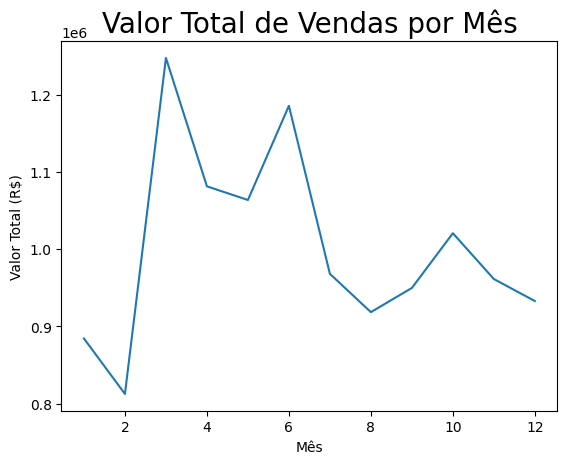

In [81]:
# Agrupando vendas por m√™s
vendas_mensais = df_vendas.groupby('mes')['valor_total'].sum()

# Criando um simples gr√°fico de linha
vendas_mensais.plot(kind='line') # O par√¢metro 'kind' especifica qual tipo de gr√°fico queremos, nesse caso, linha (line)
plt.title('Valor Total de Vendas por M√™s',fontsize=20) # T√≠tulo do gr√°fico
plt.xlabel('M√™s') # R√≥tulo do eixo x
plt.ylabel('Valor Total (R$)') # R√≥tulo do eixo y
plt.show()

### 7.2 Gr√°ficos de Barras
Os gr√°ficos de barras s√£o √≥timos para comparar valores entre diferentes categorias.

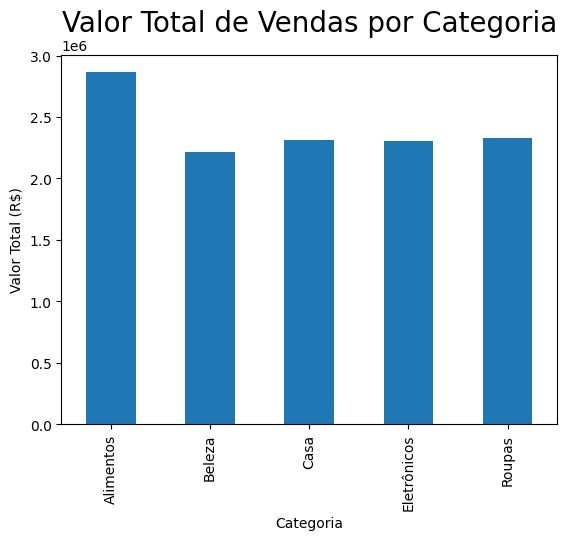

In [80]:
# Valor total de vendas por categoria
vendas_por_categoria = df_vendas.groupby('categoria')['valor_total'].sum()

# Criando um gr√°fico de barras simples
vendas_por_categoria.plot(kind='bar')
plt.title('Valor Total de Vendas por Categoria',fontsize=20)
plt.xlabel('Categoria')
plt.ylabel('Valor Total (R$)')
plt.show()

### 7.3 Histogramas
Histogramas mostram a distribui√ß√£o dos seus dados, dividindo os valores em intervalos (bins).

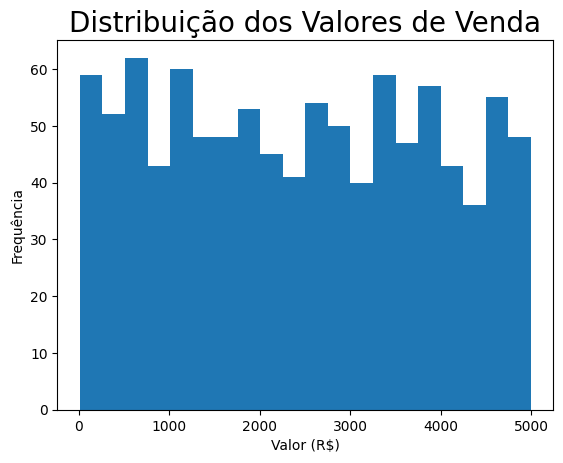

In [78]:
# Histograma dos valores de venda
df_vendas['valor_venda'].plot(kind='hist', bins=20)
plt.title('Distribui√ß√£o dos Valores de Venda',fontsize=20)
plt.xlabel('Valor (R$)')
plt.ylabel('Frequ√™ncia')
plt.show()

### 7.4 Personalizando Gr√°ficos
Voc√™ pode personalizar seus gr√°ficos adicionando cores, marcadores e outros elementos.

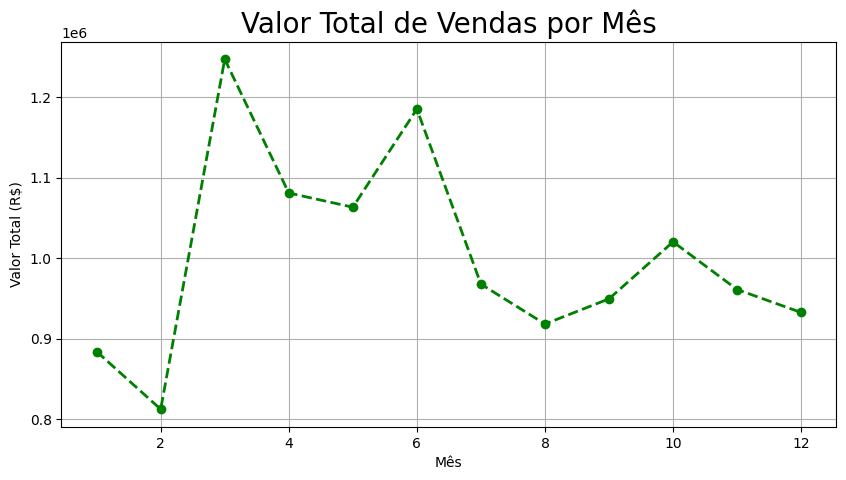

In [77]:
# Personalizando um gr√°fico de linha
vendas_mensais.plot(
    kind='line',
    figsize=(10, 5),   # Tamanho da figura
    color='green',     # Cor da linha
    marker='o',        # Marcador nos pontos
    linestyle='--',    # Estilo da linha
    linewidth=2        # Espessura da linha
)
plt.title('Valor Total de Vendas por M√™s', fontsize=20)
plt.xlabel('M√™s')
plt.ylabel('Valor Total (R$)')
plt.grid(True)
plt.show()

#### Exerc√≠cio 7: Visualiza√ß√£o de Dados
Agora √© sua vez de praticar a cria√ß√£o de gr√°ficos com Pandas:

##### 7.1 Crie um gr√°fico de barras mostrando o n√∫mero de vendas por canal_venda

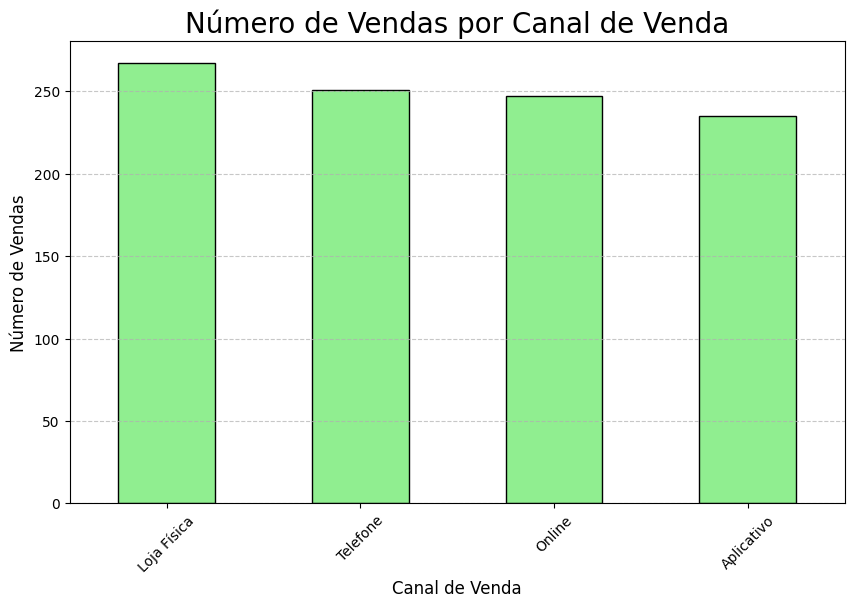

In [133]:
import matplotlib.pyplot as plt

# Cod contando o n√∫mero de vendas por canal
vendas_por_canal = df_vendas['canal_venda'].value_counts()

# Cod criando o gr√°fico de barras
plt.figure(figsize=(10, 6))
vendas_por_canal.plot(kind='bar', color='lightgreen', edgecolor='black')

# Aqui temos um cod que adiciona t√≠tulo e r√≥tulos
plt.title('N√∫mero de Vendas por Canal de Venda', fontsize=20)
plt.xlabel('Canal de Venda', fontsize=12)
plt.ylabel('N√∫mero de Vendas', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


##### 7.2 Crie um gr√°fico de linha simples mostrando a m√©dia de valor_venda por m√™s

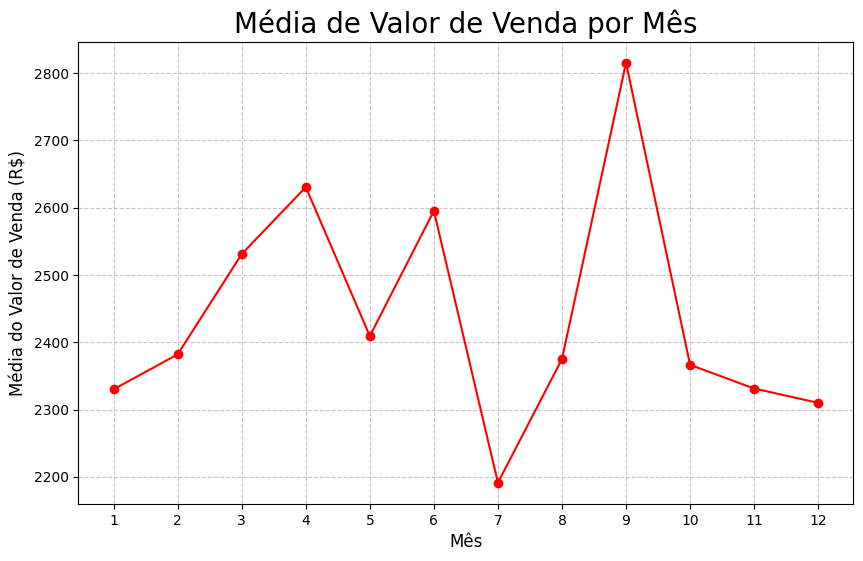

In [137]:
import matplotlib.pyplot as plt

# Converter a coluna data para datetime e extraindo o m√™s
df_vendas['data'] = pd.to_datetime(df_vendas['data'])
df_vendas['mes'] = df_vendas['data'].dt.month

# Calculando a m√©dia de valor de venda por m√™s
media_venda_por_mes = df_vendas.groupby('mes')['valor_venda'].mean()

plt.figure(figsize=(10, 6))
media_venda_por_mes.plot(kind='line', marker='o', color='red', linestyle='-')

# Os t√≠tulo e r√≥tulos
plt.title('M√©dia de Valor de Venda por M√™s', fontsize=20)
plt.xlabel('M√™s', fontsize=12)
plt.ylabel('M√©dia do Valor de Venda (R$)', fontsize=12)
plt.xticks(range(1, 13))  # Ajustando os meses no eixo x
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

##### 7.3 Crie um histograma da coluna 'avaliacao' e adicione um t√≠tulo

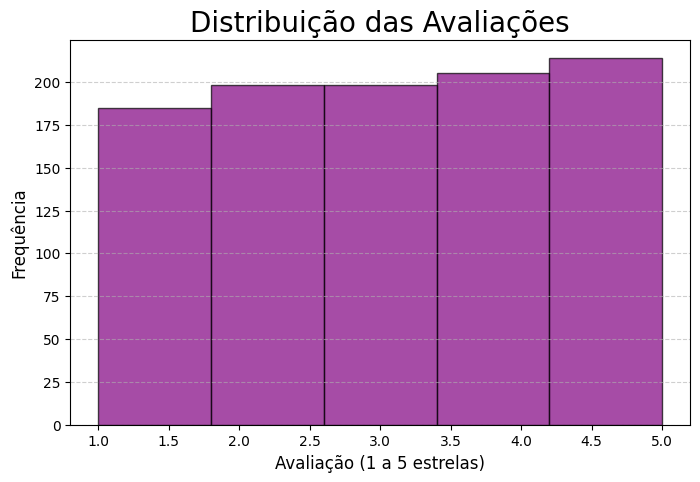

In [135]:
import matplotlib.pyplot as plt

# Criando o histograma da coluna 'avaliacao'
plt.figure(figsize=(8, 5))
df_vendas['avaliacao'].plot(kind='hist', bins=5, color='purple', edgecolor='black', alpha=0.7)

# Os t√≠tulo e r√≥tulos
plt.title('Distribui√ß√£o das Avalia√ß√µes', fontsize=20)
plt.xlabel('Avalia√ß√£o (1 a 5 estrelas)', fontsize=12)
plt.ylabel('Frequ√™ncia', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()


##### 7.4 Crie um gr√°fico de barras mostrando o total de vendas por regi√£o

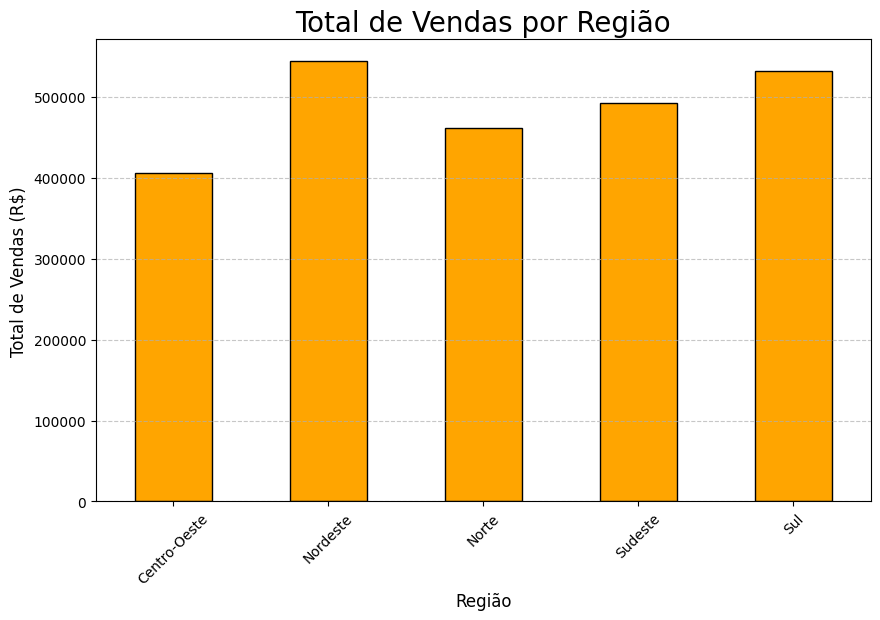

In [86]:
import matplotlib.pyplot as plt

# Calculando o total de vendas por regi√£o
vendas_por_regiao = df_vendas.groupby('regiao')['valor_venda'].sum()

# Criando o gr√°fico de barras
plt.figure(figsize=(10, 6))
vendas_por_regiao.plot(kind='bar', color='orange', edgecolor='black')

# Os t√≠tulo e r√≥tulos
plt.title('Total de Vendas por Regi√£o', fontsize=20)
plt.xlabel('Regi√£o', fontsize=12)
plt.ylabel('Total de Vendas (R$)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

---

# Voc√™ Chegou ao Fim!

Parab√©ns por ter chegado at√© aqui, guerreiro(a) dos dados!
(A n√£o ser que voc√™ tenha pulado tudo e vindo direto pra c√°... hmm, estamos de olho üëÄ)

Esperamos que voc√™ tenha conseguido resolver todos os exerc√≠cios - ou pelo menos tenha quebrado a cabe√ßa tentando!

## üìã Antes de enviar, d√° uma conferida final:
- Todas as c√©lulas est√£o funcionando? (Por favor, diz que sim üôè)
- Voc√™ respondeu todas as quest√µes? (Aquela do meio era dif√≠cil, n√©?)
- O c√≥digo est√° rodando sem erros? (Ou sem MUITOS erros, pelo menos üòÖ)

## üì§ INSTRU√á√ïES DE ENTREGA:
- Envie este notebook para: lads.unama@gmail.com
- Prazo: Domingo, 18/05/2025, √†s 23:59

Voc√™ pode mandar o arquivo direto ou o link do seu GitHub - escolha a op√ß√£o que te deixa mais zen!

Boa sorte e at√© a pr√≥xima fase (pensamento positivo, n√©?)! üí™

‚Äî Equipe LADS, que j√° est√° ansiosa pra ver a magia que voc√™ fez com esses dados